In [1]:
import os 

import pandas as pd 
import numpy as np 

In [2]:
# Taken from last page in https://arxiv.org/pdf/1805.10365.pdf

In [3]:
keijzer = [["keijzer1", "0.3*np.sin(2*np.pi*x)", 
      ("e", {'x':(-1, 1, 0.1)}), 
      ("e", {'x':(-1, 1, 0.001)})], 
     ["keijzer2", "0.3*np.sin(2*np.pi*x)", 
      ("e", {'x':(-2, 2, 0.1)}), 
      ("e", {'x':(-2, 2, 0.001)})],
     ["keijzer3", "0.3*np.sin(2*np.pi*x)",  
      ("e", {'x':(-3, 3, 0.1)}),  
      ("e", {'x':(-3, 3, 0.001)})],
     ["keijzer4", "(x**3)*np.exp(-x)*np.cos(x)*np.sin(x)*((np.sin(x)**2)*np.cos(x)-1)",  
      ("e", {'x':(0, 10, 0.1)}),  
      ("e", {'x':(0.05, 10.05, 0.1)})],
     ["keijzer5", "30*x*z/((x-10)*y**2)", 
      ('u', {'x':(-1, 1, 1000), 'y':(-1, 1, 1000), 'z':(1, 2, 1000)}), 
      ('u', {'x':(-1, 1, 10000), 'y':(-1, 1, 10000), 'z':(1, 2, 10000)})],
    ["keijzer6", "np.array([np.sum(np.apply_along_axis(lambda z: 1/z, 0, np.arange(1,xi+1))) for xi in x])", 
     ("e", {'x':(1, 50, 1)}), 
     ("e",{'x':(1, 120, 1)})], 
    ["keijzer7", "np.log(x)", 
     ("e", {'x':(1, 100, 1)}), 
     ("e", {'x':(1, 100, 0.1)})], 
    ["keijzer8", "np.sqrt(x)",  
     ("e", {'x':(1, 100, 1)}),  
     ("e", {'x':(1, 100, 0.1)})], 
    ["keijzer9", "np.arcsinh(x)",  
     ("e", {'x':(1, 100, 1)}),  
     ("e", {'x':(1, 100, 0.1)})],
    ["keijzer10", "np.power(x,y)", 
     ("u", {'x':(0, 1, 100), 'y':(0, 1, 100)}), 
     ("u", {'x':(0, 1, 0.1),'y':(0, 1, 0.1) })], 
    ["keijzer11", "x*y + np.sin((x-1)*(y-1))", 
     ("u", {'x':(-3, 3, 20), 'y': (-3, 3, 20)}), 
     ("u", {'x':(-3, 3, 0.01), 'y':(-3, 3, 0.01)})], 
    ["keijzer12", "x**4 - x**3 + y**2 /2 - y", 
     ("u", {'x' :(-3, 3, 20), 'y' : (-3, 3, 20)}), 
     ("u", {'x' :(-3, 3, 0.01), 'y' :(-3, 3, 0.01)})], 
    ["keijzer13", "6*np.sin(x)*np.cos(y)", 
     ("u", {'x':(-3,3,20), 'y':(-3,3,20)}), 
     ("u", {'x':(-3,3,0.01), 'y':(-3,3,0.01)})], 
    ["keijzer14", "8/(2+x**2+y**2)", 
     ('u', {'x':(-3,3,20), 'y':(-3,3,20)}), 
     ('u', {'x':(-3,3,0.01), 'y':(-3,3,0.01)})], 
    ["keijzer15", "x**3 /5 + y**3 /2 - y - x ", 
     ("u", {'x':(-3,3,20), 'y':(-3,3,20)}), 
     ("u", {'x':(-3,3,0.01), 'y':(-3,3,0.01)})]]

nguyen = [
    ['nguyen1', 'x**3 + x**2 + x', 
     ('u', {'x':(-1,1,20)}), 
     ('u', {'x':(-1,1,20)})],
    ['nguyen2', 'x**4 + x**3 + x**2 + x', 
     ("u", {'x':(-1,1,20)}), 
     ("u", {'x':(-1,1,20)})],
    ['nguyen3', 'x**5 + x**4 + x**3 + x**2 + x', 
     ("u", {'x':(-1,1,20)}), 
     ("u", {'x':(-1,1,20)})],
    ['nguyen4', 'x**6 + x**5 + x**4 + x**3 + x**2 + x', 
     ("u", {'x':(-1,1,20)}), 
     ("u", {'x':(-1,1,20)})],
    ['nguyen5', 'np.sin(x**2) * np.cos(x) - 1', 
     ("u", {'x':(-1,1,20)}), 
     ("u", {'x':(-1,1,20)})],
    ['nguyen6', 'np.sin(x) + np.sin(x + x**2)', 
     ("u", {'x':(-1,1,20)}), 
     ("u", {'x':(-1,1,20)})],
    ['nguyen7', 'np.log(x+1) + np.log(x**2 + 1)', 
     ("u", {'x':(0,2,20)}), 
     ("u", {'x':(0,2,20)})],
    ['nguyen8', 'np.sqrt(x)', 
     ("u", {'x':(0,4,20)}), 
     ("u", {'x':(0,4,20)})],
    ['nguyen9', 'np.sin(x) + np.sin(y**2)', 
     ("u", {'x':(-1,1,20), 'y':(-1,1,20)}), 
     ("u", {'x':(-1,1,20), 'y':(-1,1,20)})],
    ['nguyen10', '2 * np.sin(x) * np.cos(y)', 
     ("u", {'x':(-1,1,20),'y':(-1,1,20)}), 
     ("u", {'x':(-1,1,20), 'y':(-1,1,20)})]]

In [4]:
eps = np.finfo(float).eps

In [5]:
#https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7423910
    
korns = [['korns1', "1.57+24.3*v", 
      ("u", {'v':(-50,50,1000)}), 
      ("u", {'v':(-50,50,1000)})],
    ['korns2', "0.23 + 14.2 * (v + y) / 3 * w", 
     ("u", {'v':(-50,50,1000),'w':(-50,50,1000), 'y':(-50,50,1000)}), 
     ("u", {'v':(-50,50,1000),'w':(-50,50,1000), 'y':(-50,50,1000)})],
    ['korns3', "-5.41 + 4.9 * (v - x + y / w ) / 3 * w", 
     ("u", {'v':(-50,50,1000),'w':(-50,50,1000), 'x':(-50,50,1000), 'y':(-50,50,1000)}),
     ("u", {'v':(-50,50,1000),'w':(-50,50,1000), 'x':(-50,50,1000), 'y':(-50,50,1000)})],
    ['korns4', "-2.3 + 0.13 * np.sin(z)",
     ("u", {'z':(-50,50,1000)}), 
     ("u", {'z':(-50,50,1000)})],
    ['korns5', "3 + 2.13 * np.log10(w)", 
     ("u", {'w':(-50,50,1000)}), 
     ("u", {'w':(-50,50,1000)})],
    ['korns6', "1.3 + 0.13 * np.sqrt(x)", 
     ("u", {'x':(0,100,1000)}), 
     ("u", {'x':(0,100,1000)})],
    ['korns7', "213.809408 * (1 - np.exp(-0.547237 * x))", 
     ("u", {'x':(-50,50,1000)}), 
     ("u", {'x':(-50,50,1000)})],
    ['korns8', "6.87 + 11 * np.sqrt(7.23 * x * v * w)", 
     ("u", {'v':(-50,50,1000), 'w':(-50,50,1000), 'x':(-50,50,1000)}), 
     ("u", {'v':(-50,50,1000), 'w':(-50,50,1000), 'x':(-50,50,1000)})],
    ['korns9', "(np.sqrt(x0) / np.log10(x1)) * (np.exp(x2) / np.square(x3))", 
     ("u", {'x0':(-50,50,1000), 'x1':(-50,50,1000), 'x2':(-50,50,1000), 'x3':(-50,50,1000)}), 
     ("u", {'x0':(-50,50,1000), 'x1':(-50,50,1000), 'x2':(-50,50,1000), 'x3':(-50,50,1000)})],
    ['korns10', "0.81 + 24.3 * (2*y + 3 * z**2) / (4 * v**3 + 5 * w**4)", 
     ("u", {'v':(-50,50,1000), 'w':(-50,50,1000), 'y':(-50,50,1000), 'z':(-50,50,1000)}), 
     ("u", {'v':(-50,50,1000), 'w':(-50,50,1000), 'y':(-50,50,1000), 'z':(-50,50,1000)})],
    ['korns11', "6.87 + 11 * np.cos(7.23 * x**3)", 
     ("u", {'x':(-50,50,1000)}), 
     ("u", {'x':(-50,50,1000)})],
    ['korns12', "2 - 2.1 * np.cos(9.8 * x) * np.sin(1.3 * w)", 
     ("u", {'x':(-50,50,1000),'w':(-50,50,1000)}), 
     ("u", {'x':(-50,50,1000),'w':(-50,50,1000)})],
    ['korns13', "32 - 3 * np.tan(x)/np.tan(y) * np.tan(z)/np.tan(v)", 
     ("u", {'v':(-50,50,1000), 'x':(-50,50,1000), 'y':(-50,50,1000), 'z':(-50,50,1000)}), 
     ("u", {'v':(-50,50,1000), 'x':(-50,50,1000), 'y':(-50,50,1000), 'z':(-50,50,1000)})],
    ['korns14', "22 - 4.2 * (np.cos(x) - np.tan(y)) * np.tan(z) / np.sin(v)", 
     ("u", {'v':(-50,50,1000), 'x':(-50,50,1000), 'y':(-50,50,1000), 'z':(-50,50,1000)}), 
     ("u", {'v':(-50,50,1000), 'x':(-50,50,1000), 'y':(-50,50,1000), 'z':(-50,50,1000)})],
    ['korns15', "12 - 6 * np.tan(x) / np.exp(y) * (np.log(z) - np.tan(v))", 
     ("u", {'v':(-50,50,1000), 'x':(-50,50,1000), 'y':(-50,50,1000), 'z':(-50,50,1000)}), 
     ("u", {'v':(-50,50,1000), 'x':(-50,50,1000), 'y':(-50,50,1000), 'z':(-50,50,1000)})]]

In [6]:
others = [['burks', '4 * x**4 + 3 * x**3 + 2 * x**2 + x', 
           ("u", {'x':(-1,1,20)}),  
           ("u", {'x':(-1,1,20)})], 
          ["koza2", 'x**5 - 2 * x**3 + x', 
           ("u", {'x':(-1,1,20)}), 
           ("u", {'x':(-1,1,20)})], 
          ["koza3", 'x**6 - 2 * x**4 + x**2', 
           ("u", {'x':(-1,1,20)}), 
           ("u", {'x':(-1,1,20)})], 
          ["meier3", '(x1**2 * x2**2) / (x1 + x2)', 
           ("u", {'x1':(-1,1,50), 'x2':(-1,1,50)}), 
           ("u", {'x1':(-1,1,50), 'x2':(-1,1,50)})], 
          ["meier4", 'x1**5 / (x2**3)', 
           ("u", {'x1':(-1,1,50), 'x2':(-1,1,50)}), 
           ("u", {'x1':(-1,1,50), 'x2':(-1,1,50)})], 
          ["pagie1", '1 / (1+x1**(-4)) + 1 / (1+x2**(-4))', 
           ("u", {'x1':(-5,5,0.4), 'x2':(-5,5,0.4)}), 
           ("u", {'x1':(-5,5,0.4), 'x2':(-5,5,0.4)})], 
          ['poly10', 'x1 * x2 + x3 * x4 + x5 * x6 + x1 * x7 * x9 + x3 * x6 * x10', 
           ("u", {'x1':(0,1,330), 'x2':(0,1,330), 'x3':(0,1,330), 'x4':(0,1,330), 'x5':(0,1,330), 'x6':(0,1,330), 'x7':(0,1,330), 'x9':(0,1,330), 'x10':(0,1,330)}), 
           ("u", {'x1':(0,1,170), 'x2':(0,1,170), 'x3':(0,1,170), 'x4':(0,1,170), 'x5':(0,1,170), 'x6':(0,1,170), 'x7':(0,1,170), 'x9':(0,1,170), 'x10':(0,1,170)})], 
          ['R1', '(x+1)**3 / (x**2 - x + 1)', 
           ("e", {"x": (-1,1, 20)}), 
           ("u", {"x": (-1,1, 20)})],
          ['R2', '(x**5 - 3 * x**3 + 1) / (x**2 + 1)', 
           ("e", {"x": (-1,1, 20)}), 
           ("u", {"x": (-1,1, 20)})], 
          ['R3', '(x**6 + x**5) / (x**4 + x**3 + x**2 +x + 1)', 
           ("e", {"x": (-1,1, 20)}), 
           ("u", {"x": (-1,1, 20)})], 
          ['sine', 'np.sin(x) + np.sin(x + x**2)', 
           ("e", {"x": ( 0,6.2,0.1)}), 
           ("u", {"x": (0,6.2,0.1)})], 
          ['vladislavleva1', 'np.exp(-(x1-1)**2)/(1.2 + (x2 - 2.5)**2)', 
           ("u", {"x1": (0.3,4,100), "x2": (0.3,4,100)}), 
           ("e", {"x1": (-0.2,4.2,0.1), "x2": (-0.2,4.2,0.1)})], 
          ['vladislavleva2', 'np.exp(-x1)* x1**3 * (np.cos(x1) *  np.sin(x1))*(np.cos(x1) *  np.sin(x1)**2 - 1)', 
           ("e", {"x1": (0.05,10,0.1)}), 
           ("e", {"x1": (-0.5,10.5,0.05)})], 
          ['vladislavleva3', 'np.exp(-x1)* x1**3 * (np.cos(x1) *  np.sin(x1))*(np.cos(x1) *  np.sin(x1)**2 - 1)*(x2-5)', 
           ("e", {"x1": (0.05,10,0.1), "x2": (0.05,10.05,2)}), 
           ("e", {"x1": (-0.5,10.5,0.05), "x2": (-0.5,10.5,0.5)})], 
          ['vladislavleva4', '10/(5+(x1-3)**2+(x2-3)**2+(x3-3)**2+(x4-3)**2+(x5-3)**2)', 
           ("u", {"x1": (0.05,6.05,1024), "x2": (0.05,6.05,1024), "x3": (0.05,6.05,1024), "x4": (0.05,6.05,1024), "x5": (0.05,6.05,1024)}), 
           ("u", {"x1": (-0.25,6.35,5000), "x2": (-0.25,6.35,5000), "x3": (-0.25,6.35,5000), "x4": (-0.25,6.35,5000), "x5": (-0.25,6.35,5000)})], 
          ['vladislavleva5', '30*(x1-1)*(x3-1)/((x1-10)*x2**2)', 
           ('u', {'x1': (0.05,2,300),'x2': (1,2,300), 'x3': (0.05,2,300)}), 
           ('e', {'x1': (-0.05, 2.1, 0.15), 'x2': (0.95, 2.05, 0.1), 'x3': (-0.05, 2.1, 0.15)})],
          ['vladislavleva6', '6*np.sin(x1)*np.cos(x2)', 
           ("u", {"x1": (0.1,5.9,30), 'x2': (0.1,5.9,30) }),
           ("e", {"x1": (-0.05,6.05,0.02), "x2": (-0.05,6.05,0.02)})], 
          ['vladislavleva7', '(x1-3)*(x2-3)+2*np.sin((x1-4)*(x2-4))', 
           ("u", {'x1': (0.05, 6.05,300), 'x2': (0.05, 6.05,300)}),
           ("u", {"x1": (-0.25,6.35,1000), "x2": (-0.25,6.35,1000)})], 
          ['vladislavleva8', '((x1-3)**4+(x2-3)**3-(x2-3))/((x2-2)**4+10)', 
           ("u", {"x1": (0.05,6.05,50), "x2": (0.05,6.05,50)}), 
           ("e", {"x1": (-0.25,6.35,0.2), "x2": (-0.25,6.35,0.2)})]]

In [7]:
functions_df = pd.DataFrame(keijzer + nguyen + korns + others, columns=["function_name",'function', 'training_data', 'testing_data'])
functions_df.to_csv('benchmark.csv')

In [8]:
len(functions_df)

59

In [9]:
def generate_data(sampling_type, params, data_type="train"):
    df = pd.DataFrame()
    if sampling_type == 'u':
        for key, value in params.items():
            start, stop, spacing = value

            if spacing <= (stop - start ):
                print("spacing error with u")
                spacing = int((stop - start ) / spacing)
            data = np.random.uniform(start, stop, spacing)
            
            df.loc[:, key] = data
            exec(f'{key}=np.array({data.tolist()})')

    elif sampling_type == 'e': 
        nb_features = len(list(params.keys()))
        if nb_features == 1: 
            for key, value in params.items():
                start, stop, spacing = value
                if spacing >= (stop - start ):
                    print("spacing error with e nb_feat ==1 ")
                    spacing = (stop - start ) / spacing
                data = np.arange(start, stop, step=spacing)

                df.loc[:, key] = data
                exec(f'{key}=np.array({data.tolist()})')
        elif nb_features > 1: 
            mesh_points = []
            for key, value in params.items():
                start, stop, spacing = value
                if spacing >= (stop - start ):
                    print("spacing error with e nb_feat > 1")
                    spacing = (stop - start ) / spacing
                
                mesh_points.append(np.arange(start, stop+spacing, step=spacing))
            
            data = np.meshgrid(*mesh_points, indexing = "ij")
            for c, matrix_data in zip(list(params.keys()), data):
                flat_data =  matrix_data.ravel()
                df.loc[:, c] = matrix_data.ravel()
                exec(f'{c}=np.array({df[c].values.tolist()})')
    else : 
        raise ValueError('Sampling type not implemented')
    
    if df.isna().values.any() : 
        raise ValueError('invalid generated inputs')
    df.loc[:, "target"] = eval(function)
    
    print(df.shape)
    df.to_csv(os.path.join(name, f'{data_type}.csv'), index=False)

In [10]:
for i, r in functions_df.iterrows(): 
    name = r.function_name
    print(name)
    function = r.function
    training_sampling_type, training_params = r.training_data
    testing_sampling_type, testing_params = r.testing_data
    
    #create folder 
    os.makedirs(name, exist_ok=True)
    
    # generate training data 
    generate_data(training_sampling_type, training_params, 'train')
    
    
    # generate training data 
    generate_data(testing_sampling_type, testing_params, 'test')
    

keijzer1
(20, 2)
(2000, 2)
keijzer2
(40, 2)
(4000, 2)
keijzer3
(60, 2)
(6000, 2)
keijzer4
(100, 2)
(100, 2)
keijzer5
(1000, 4)
(10000, 4)
keijzer6
(49, 2)
(119, 2)
keijzer7
(99, 2)
(990, 2)
keijzer8
(99, 2)
(990, 2)
keijzer9
(99, 2)
(990, 2)
keijzer10
(100, 3)
spacing error with u
spacing error with u
(10, 3)
keijzer11
(20, 3)
spacing error with u
spacing error with u
(600, 3)
keijzer12
(20, 3)
spacing error with u
spacing error with u
(600, 3)
keijzer13
(20, 3)
spacing error with u
spacing error with u
(600, 3)
keijzer14
(20, 3)
spacing error with u
spacing error with u
(600, 3)
keijzer15
(20, 3)
spacing error with u
spacing error with u
(600, 3)
nguyen1
(20, 2)
(20, 2)
nguyen2
(20, 2)
(20, 2)
nguyen3
(20, 2)
(20, 2)
nguyen4
(20, 2)
(20, 2)
nguyen5
(20, 2)
(20, 2)
nguyen6
(20, 2)
(20, 2)
nguyen7
(20, 2)
(20, 2)
nguyen8
(20, 2)
(20, 2)
nguyen9
(20, 3)
(20, 3)
nguyen10
(20, 3)
(20, 3)
korns1
(1000, 2)
(1000, 2)
korns2
(1000, 4)
(1000, 4)
korns3
(1000, 5)
(1000, 5)
korns4
(1000, 2)
(1000

/home/crochepierrelau/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/home/crochepierrelau/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


(1000, 2)
korns8
(1000, 4)
(1000, 4)
korns9
(1000, 5)
(1000, 5)
korns10
(1000, 5)


/home/crochepierrelau/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


(1000, 5)
korns11
(1000, 2)
(1000, 2)
korns12
(1000, 3)
(1000, 3)
korns13
(1000, 5)
(1000, 5)
korns14
(1000, 5)
(1000, 5)
korns15
(1000, 5)
(1000, 5)
burks
(20, 2)
(20, 2)
koza2
(20, 2)
(20, 2)
koza3
(20, 2)
(20, 2)
meier3
(50, 3)


/home/crochepierrelau/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


(50, 3)
meier4
(50, 3)
(50, 3)
pagie1
spacing error with u
spacing error with u
(25, 3)
spacing error with u
spacing error with u
(25, 3)
poly10
(330, 10)
(170, 10)
R1
spacing error with e nb_feat ==1 
(20, 2)
(20, 2)
R2
spacing error with e nb_feat ==1 
(20, 2)
(20, 2)
R3
spacing error with e nb_feat ==1 
(20, 2)
(20, 2)
sine
(62, 2)
spacing error with u
(62, 2)
vladislavleva1
(100, 3)
(2025, 3)
vladislavleva2
(100, 2)
(220, 2)
vladislavleva3
(606, 3)
(5083, 3)
vladislavleva4
(1024, 6)
(5000, 6)
vladislavleva5
(300, 4)
(3072, 4)
vladislavleva6
(30, 3)
(93636, 3)
vladislavleva7
(300, 3)
(1000, 3)
vladislavleva8
(50, 3)
(1156, 3)


In [11]:
df = pd.read_csv("korns1/train.csv")

In [12]:
for i, r in functions_df[functions_df.function_name == 'vladislavleva3'].iterrows(): 
    name = r.function_name
    print(name)
    function = r.function
    training_sampling_type, training_params = r.training_data
    testing_sampling_type, testing_params = r.testing_data
    
    #create folder 
    os.makedirs(name, exist_ok=True)
    
    # generate training data 
    generate_data(training_sampling_type, training_params, 'train')
    
    
    # generate training data 
    generate_data(testing_sampling_type, testing_params, 'test')
    

vladislavleva3
(606, 3)
(5083, 3)


In [13]:
df = pd.read_csv("vladislavleva3/train.csv")

In [14]:
df

,x1,x2,target
0,0.05,0.05,0.000029
1,0.05,2.05,0.000017
2,0.05,4.05,0.000006
3,0.05,6.05,-0.000006
4,0.05,8.05,-0.000018
...,...,...,...
601,10.05,2.05,0.078415
602,10.05,4.05,0.025252
603,10.05,6.05,-0.027910
604,10.05,8.05,-0.081073


In [15]:
import numpy as np

In [152]:
from math import ceil
import numpy as np
np.seterr(all="raise")


def minimum(list_of_arrays):
    x = np.array(list_of_arrays)
    return x.min(-2)


def maximum(list_of_arrays):
    x = np.array(list_of_arrays)
    return x.max(-2)


def abs_list(li) :
    li = np.abs(np.array(li))
    return [el for el in abs_list(li)]


def neg(A):
    return np.where(A > 0, A, 0)


def pos(A):
    return np.where(A < 0, A, 0)


def opposite(A):
    return -A


def sqrt_add(A, B):
    return np.sqrt(np.add(A, B))


def if_then_else(A, B, C):
    return np.where(A, B, C)


def return_one_percent(num, pop_size):
    """
    Returns either one percent of the population size or a given number,
    whichever is larger.

    :param num: A given number of individuals (NOT a desired percentage of
    the population).
    :param pop_size: A given population size.
    :return: either one percent of the population size or a given number,
    whichever is larger.
    """

    # Calculate one percent of the given population size.
    percent = int(round(pop_size/100))

    # Return the biggest number.
    if percent < num:
        return num
    else:
        return percent


def return_percent(num, pop_size):
    """
    Returns [num] percent of the population size.

    :param num: A desired percentage of the population.
    :param pop_size: A given population size.
    :return: [num] percent of the population size.
    """

    return int(round(num * pop_size / 100))


def aq(a, b):
    """aq is the analytic quotient, intended as a "better protected
    division", from: Ji Ni and Russ H. Drieberg and Peter I. Rockett,
    "The Use of an Analytic Quotient Operator in Genetic Programming",
    IEEE Transactions on Evolutionary Computation.

    :param a: np.array numerator
    :param b: np.array denominator
    :return: np.array analytic quotient, analogous to a / b.

    """
    return a / np.sqrt(1.0 + b**2.0)


def pdiv(x, y):
    """
    Koza's protected division is:

    if y == 0:
      return 1
    else:
      return x / y

    but we want an eval-able expression. The following is eval-able:

    return 1 if y == 0 else x / y

    but if x and y are Numpy arrays, this creates a new Boolean
    array with value (y == 0). if doesn't work on a Boolean array.

    The equivalent for Numpy is a where statement, as below. However
    this always evaluates x / y before running np.where, so that
    will raise a 'divide' error (in Numpy's terminology), which we
    ignore using a context manager.

    In some instances, Numpy can raise a FloatingPointError. These are
    ignored with 'invalid = ignore'.

    :param x: numerator np.array
    :param y: denominator np.array
    :return: np.array of x / y, or 1 where y is 0.
    """
    try:
        with np.errstate(divide='ignore', invalid='ignore'):
            return np.where(y == 0, np.ones_like(x), x / y)
    except ZeroDivisionError:
        # In this case we are trying to divide two constants, one of which is 0
        # Return a constant.
        return 1.0


def rlog(x):
    """
    Koza's protected log:
    if x == 0:
      return 1
    else:
      return log(abs(x))

    See pdiv above for explanation of this type of code.

    :param x: argument to log, np.array
    :return: np.array of log(x), or 1 where x is 0.
    """
    with np.errstate(divide='ignore'):
        return np.where(x == 0, np.ones_like(x), np.log(np.abs(x)))


def ppow(x, y):
    """pow(x, y) is undefined in the case where x negative and y
    non-integer. This takes abs(x) to avoid it.

    :param x: np.array, base
    :param y: np.array, exponent
    :return: np.array x**y, but protected

    """
    return np.abs(x)**y


def ppow2(x, y):
    """pow(x, y) is undefined in the case where x negative and y
    non-integer. This takes abs(x) to avoid it. But it preserves
    sign using sign(x).

    :param x: np.array, base
    :param y: np.array, exponent
    :return: np.array, x**y, but protected
    """
    return np.sign(x) * (np.abs(x) ** y)


def psqrt(x):
    """
    Protected square root operator

    :param x: np.array, argument to sqrt
    :return: np.array, sqrt(x) but protected.
    """
    return np.sqrt(np.abs(x))


def psqrt2(x):
    """
    Protected square root operator that preserves the sign of the original
    argument.

    :param x: np.array, argument to sqrt
    :return: np.array, sqrt(x) but protected, preserving sign.
    """
    return np.sign(x) * (np.sqrt(np.abs(x)))


def plog(x):
    """
    Protected log operator. Protects against the log of 0.

    :param x: np.array, argument to log
    :return: np.array of log(x), but protected
    """
    return np.log(1.0 + np.abs(x))


def ave(x):
    """
    Returns the average value of a list.

    :param x: a given list
    :return: the average of param x
    """

    return np.mean(x)


def percentile(sorted_list, p):
    """
    Returns the element corresponding to the p-th percentile
    in a sorted list

    :param sorted_list: The sorted list
    :param p: The percetile
    :return: The element corresponding to the percentile
    """

    return sorted_list[ceil(len(sorted_list) * p / 100) - 1]


def binary_phen_to_float(phen, n_codon, min_value, max_value):
    """
    This method converts a phenotype, defined by a
    string of bits in a list of float values

    :param phen: Phenotype defined by a bit string
    :param n_codon: Number of codons per gene, defined in the grammar
    :param min_value: Minimum value for a gene
    :param max_value: Maximum value for a gene
    :return: A list os float values, representing the chromosome
    """

    i, count, chromosome = 0, 0, []

    while i < len(phen):
        # Get the current gene from the phenotype string.
        gene = phen[i:(i + n_codon)]

        # Convert the bit string in gene to an float/int
        gene_i = int(gene, 2)
        gene_f = float(gene_i) / (2 ** n_codon - 1)

        # Define the variation for the gene
        delta = max_value[count] - min_value[count]

        # Append the float value to the chromosome list
        chromosome.append(gene_f * delta + min_value[count])

        # Increment the index and count.
        i = i + n_codon
        count += 1

    return chromosome


def ilog(n, base):
    """
    Find the integer log of n with respect to the base.

    >>> import math
    >>> for base in range(2, 16 + 1):
    ...     for n in range(1, 1000):
    ...         assert ilog(n, base) == int(math.log(n, base) + 1e-10), '%s %s' % (n, base)
    """
    count = 0
    while n >= base:
        count += 1
        n //= base
    return count


def sci_notation(n, prec=3):
    """
    Represent n in scientific notation, with the specified precision.

    >>> sci_notation(1234 * 10**1000)
    '1.234e+1003'
    >>> sci_notation(10**1000 // 2, prec=1)
    '5.0e+999'
    """
    base = 10
    exponent = ilog(n, base)
    mantissa = n / base**exponent
    return '{0:.{1}f}e{2:+d}'.format(mantissa, prec, exponent)


In [153]:
x.T[0]

array([5.00000000e-02, 5.00000000e-02, 2.93063409e-05])

In [261]:
# e = '(np.cos(np.power(np.exp(np.cos((- x0 * 1.4))), 6)) / abs((np.exp(- x1) - 0)))' 
# e = "(x1 / (np.power(np.power((- x0 + 1.7), 3), 6) + 9))" 
# e = '(np.tanh(np.tan(x0)) / (x1 + 1))'
# e = "(- x1 + np.tanh(np.tan(x0))) / (- x1 + - x1)"
# e =  '(- x1 + ((x1 + 3) - 65.34)) / (np.exp((abs((- x0 + 4)) * 9)) + np.power(x1, 8))'
#e = "(- x1 + x0) / (np.cos(np.power((x0 + 5), 1)) + (np.power((- x0 + 4), 8) + 4))"
e = "(np.sin( np.tanh( ((x[0]+(x[1]*np.tanh( np.sin( (x[0]+np.tanh( np.power( np.arcsinh( (x[0]*plog( plog( np.arcsinh( np.arcsinh( np.sin( x[0] ) ) ) ) )) ) , 3) )) ) ))) / np.tanh( np.power( np.sin( np.power( np.tanh( (-9.6) ) , 3) ) , 6) )) ) )-np.tanh( ((x[0]+(x[1]*np.tanh( np.sin( (x[0]+(np.tanh( ((x[0]+np.power( np.sin( np.log( np.tanh( np.power( np.sqrt( np.power( (-7.6) , 8) ) , 8) ) ) ) , 7))+np.cos( (np.tanh( x[0] )-(np.power( plog( (x[0]+(np.power( plog( np.sin( x[1] ) ) , 7)*np.tanh( np.sin( np.cos( (np.sqrt( np.tanh( np.tanh( np.sin( (5.9+2.5) ) ) ) )-np.sin( (x[1]*np.arcsinh( np.tanh( np.sin( x[0] ) ) )) )) ) ) ))) ) , 4)*np.tanh( x[0] ))) )) )*x[0])) ) )))+np.power( plog( 2.0 ) , 5)) ))"
e = "np.power( np.cos( (np.log( x[1] )-((x[0]+np.cos( np.cos( ((np.cos( x[0] )*x[1])*np.sin( np.power( plog( np.log( np.sqrt( x[0] ) ) ) , 1) )) ) ))-np.tanh( x[0] ))) ) , 4)"
e= "np.cos( np.sin( (np.log( (plog( 8.2 )+x[1]) )-(x[0]+(np.cos( np.cos( x[0] ) )*np.power( ((np.sin( np.power( np.tanh( x[1] ) , 3) ) / 6.4) / np.power( (np.cos( np.log( np.power( np.log( x[1] ) , 4) ) )*np.exp( np.arcsinh( (np.cos( np.sin( ((np.cos( 7.4 )+np.sin( (np.arcsinh( x[0] )+(-0.1)) ))-(x[0] / plog( np.power( np.tanh( x[1] ) , 8) ))) ) )*plog( np.sin( (np.arcsinh( x[1] )+(((np.cos( x[1] )*x[1])*(np.power( ((np.cos( np.cos( x[1] ) )*(plog( plog( np.arcsinh( x[1] ) ) )+x[1]))+(x[0]+(np.sin( np.power( np.tanh( plog( np.tanh( (-4.7) ) ) ) , 6) ) / np.log( x[1] )))) , 3)+x[1]))*plog( ((np.sin( np.log( np.tanh( x[1] ) ) ) / (4.3 / np.power( (np.cos( np.log( np.power( np.log( x[1] ) , 4) ) )*np.exp( np.arcsinh( (np.cos( np.sin( np.arcsinh( x[1] ) ) )*np.log( np.exp( np.arcsinh( (np.cos( np.sin( np.arcsinh( x[1] ) ) )*np.log( x[1] )) ) ) )) ) )) , 4))) / np.exp( np.arcsinh( (np.cos( np.sin( ((np.cos( np.log( np.arcsinh( (0.2*x[0]) ) ) )+(-0.1))-(x[0] / plog( np.power( np.tanh( x[1] ) , 8) ))) ) )*plog( np.sin( (np.arcsinh( x[1] )+(((np.cos( x[1] )*x[1])*(np.power( ((np.cos( np.cos( x[1] ) )*(plog( plog( np.arcsinh( x[1] ) ) )+x[1]))+(x[0]+(np.sin( np.power( np.tanh( plog( np.tanh( (-4.7) ) ) ) , 6) ) / np.log( x[1] )))) , 3)+x[1]))*plog( ((np.sin( np.log( np.tanh( x[1] ) ) ) / (4.3 / np.power( (np.cos( np.log( np.power( np.log( x[1] ) , 4) ) )*np.exp( np.arcsinh( (np.cos( np.sin( np.log( np.cos( np.cos( 7.4 ) ) ) ) )*np.sin( (np.arcsinh( x[1] )+np.sin( np.tanh( x[1] ) )) )) ) )) , 5))) / np.sin( (7.4+np.sin( ((x[0]+(-0.2))+(x[0] / plog( np.power( np.tanh( x[1] ) , 3) ))) )) )) ))) ) )) ) )) ))) ) )) ) )) , 2)) , 1)))) ) )"

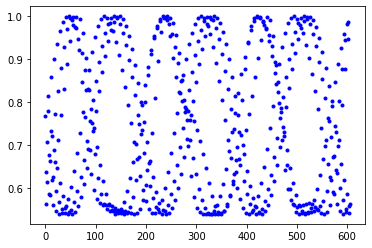

In [262]:
df = pd.read_csv("vladislavleva3/train.csv")
x0 = df.x1
x1 = df.x2

x = df.values.T
plt.plot(eval(e), '.b')

In [263]:
import matplotlib.pyplot as plt

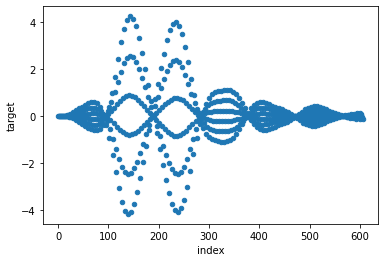

In [264]:
df.reset_index().plot('index', 'target', kind='scatter')
plt.show()

In [265]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [266]:
mean_squared_error(eval(e), df.target)

1.5409944803312479

In [267]:
pearsonr(eval(e), df.target)

(0.6095133213577225, 6.484785103124681e-63)

In [259]:
pearsonr(df.target, df.target)

(1.0, 0.0)

In [260]:
df = pd.read_csv("vladislavleva3/test.csv")
x0 = df.x1
x1 = df.x2

x = df.values.T
print(f"mse {mean_squared_error(eval(e), df.target)}")
print(f'corr {pearsonr(eval(e), df.target)}')


FloatingPointError: divide by zero encountered in log

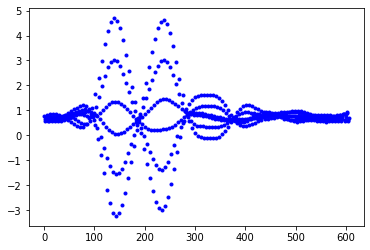

In [269]:
plt.plot(eval(e) - df.target.values, '.b')
plt.show()
